In [64]:
import math
import numpy as np
import random
pi = math.pi
import pandas as pd
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
plt.ion()
#from matplotlib.legend_handler import LandlerTuple
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import signal
import re

mpl.rcdefaults()
mpl.style.use('default')

# Comment tLis to not Lave latex plots

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


In [65]:
mycmap=["teal","mediumaquamarine","chocolate","sandybrown","blueviolet","violet","seagreen","darkseagreen"]
mycmap=["#003a7d","#008dff","#ff73b6","#c701ff","#4ecb8d","#ff9d3a","#f9e858","#d83034"]

    


In [66]:
# pi+ z dependence HERMES 9066
df9066 = pd.read_csv('LHAPDF_tables/9066.csv',sep=',', decimal = '.')

Q2_z_pp = df9066['Q2'].mean()
x_z_pp = df9066['x'].mean()
y_z_pp = df9066['y'].mean()
meas_zp_z = df9066['z']
meas_zp_value = df9066['value']
meas_zp_dvalue = df9066['stat_err_u']
print(Q2_z_pp)
print(x_z_pp)
print(y_z_pp)


2.415
0.10170000000000001
0.4976


In [67]:
# pi+ x dependence HERMES 9055
df9055 = pd.read_csv('LHAPDF_tables/9055.csv',sep=',', decimal = '.')

Q2_x_pp = df9055['Q2'].mean()
z_x_pp = df9055['z'].mean()
y_x_pp = df9055['y'].mean()
meas_xp_x = df9055['x']
meas_xp_value = df9055['value']
meas_xp_dvalue = df9055['stat_err_u']
print(Q2_x_pp)
print(z_x_pp)
print(y_x_pp)


2.7885714285714287
0.36642857142857144
0.5194285714285715


In [68]:
# pi- z dependence HERMES 10032
df10032 = pd.read_csv('LHAPDF_tables/10032.csv',sep=',', decimal = '.')


Q2_z_pm = df10032['Q2'].mean()
x_z_pm = df10032['x'].mean()
y_z_pm = df10032['y'].mean()
meas_zm_z = df10032['z']
meas_zm_value = df10032['value']
meas_zm_dvalue = df10032['stat_err_u']
print(Q2_z_pm)
print(x_z_pm)
print(y_z_pm)

2.285
0.0965
0.4983000000000001


In [69]:
# pi- x dependence HERMES 10021
df10021 = pd.read_csv('LHAPDF_tables/10021.csv',sep=',', decimal = '.')

Q2_x_pm = df10021['Q2'].mean()
z_x_pm = df10021['z'].mean()
y_x_pm = df10021['y'].mean()
meas_xm_x = df10021['x']
meas_xm_value = df10021['value']
meas_xm_dvalue = df10021['stat_err_u']
print(Q2_x_pm)
print(z_x_pm)
print(y_x_pm)

2.7742857142857145
0.3581428571428571
0.5185714285714286


In [70]:
dfxp = pd.read_csv('AUTx_LO_pp.txt',header=None,sep=' ', decimal = '.')
dfxm = pd.read_csv('AUTx_LO_pm.txt',header=None,sep=' ', decimal = '.')
dfzp = pd.read_csv('AUTz_LO_pp.txt',header=None,sep=' ', decimal = '.')
dfzm = pd.read_csv('AUTz_LO_pm.txt',header=None,sep=' ', decimal = '.')


dfxpNLO = pd.read_csv('AUTx_NLO_pp.txt',header=None,sep=' ', decimal = '.')
dfxmNLO = pd.read_csv('AUTx_NLO_pm.txt',header=None,sep=' ', decimal = '.')
dfzpNLO = pd.read_csv('AUTz_NLO_pp.txt',header=None,sep=' ', decimal = '.')
dfzmNLO = pd.read_csv('AUTz_NLO_pm.txt',header=None,sep=' ', decimal = '.')


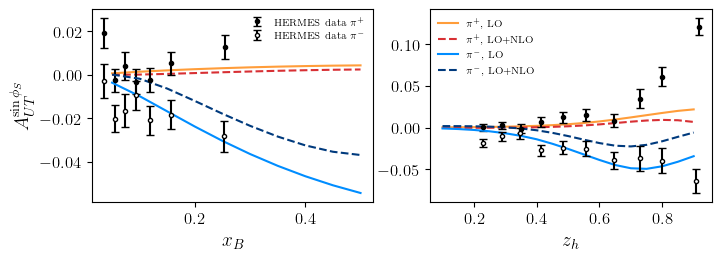

In [71]:
fs = 12
w = 8
h = 2.5

s = 52.77
y = 0.469
#xBB = 0.118
#zhh = 0.379

fig, axs = plt.subplots(1,2, figsize= (w,h), sharey = False)

#tl1 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$z_h=' + str(zh[idx_zh]) + '$'
#tl2 = '$s='+str(s) +'\\,\\rm{GeV}^2$\n'+'$y=' + str(y)+'$\n$x_B=' + str(xB[idx_xB]) + '$'

# First plot: A_UT vs xB at fixed zh

axs[0].plot(dfxp[0], dfxp[1], color="#ff9d3a")
axs[0].plot(dfxpNLO[0], dfxpNLO[1], color ="#d83034" ,linestyle='dashed',)
axs[0].errorbar(meas_xp_x,meas_xp_value,meas_xp_dvalue, linestyle='none',fmt='o',mfc='k',mec='k',ecolor='k',ms=3, capsize=3, label='HERMES data $\\pi^+$')
axs[0].plot(dfxm[0], dfxm[1], color="#008dff")
axs[0].plot(dfxmNLO[0], dfxmNLO[1], color ="#003a7d" ,linestyle='dashed')
axs[0].errorbar(meas_xm_x,meas_xm_value,meas_xm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=3, capsize=3,label='HERMES data $\\pi^-$')
#axs[0].set_xlim(0.05 ,0.3)
#axs[0].set_ylim(-0.02,0.02)
axs[0].set_xlabel('$x_B$', fontsize=14)
axs[0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)        
# Second plot: A_UT vs zh at fixed xB
axs[1].plot(dfzp[0], dfzp[1], color="#ff9d3a",label='$\\pi^+$, LO')
axs[1].plot(dfzpNLO[0], dfzpNLO[1], color ="#d83034" ,linestyle='dashed',label='$\\pi^+$, LO+NLO')
axs[1].errorbar(meas_zp_z,meas_zp_value,meas_zp_dvalue, linestyle='none',fmt='o',mfc='k',mec='k',ecolor='k',ms=3, capsize=3)
axs[1].plot(dfzm[0], dfzm[1], color="#008dff",label='$\\pi^-$, LO')
axs[1].plot(dfzmNLO[0], dfzmNLO[1], color ="#003a7d" ,linestyle='dashed',label='$\\pi^-$, LO+NLO')
axs[1].errorbar(meas_zm_z,meas_zm_value,meas_zm_dvalue, linestyle='none',fmt='o',mfc='w',mec='k',ecolor='k',ms=3, capsize=3)

#axs[1].set_xlim(0.2 ,.6)
#axs[1].set_ylim(-0.02,0.02)
axs[1].set_xlabel('$z_h$', fontsize=14)
#axs[1].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)

axs[1].tick_params(axis='both', which='major', labelsize=12)  

#axs[0].text(0.05,0.008,tl1)
#axs[1].text(0.05,0.008,tl2)
axs[0].tick_params(axis='x', which='minor')

axs[0].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-5, ncol=1)
axs[1].legend(fancybox= True, framealpha=0., loc='best', fontsize = fs-5, ncol=1)

plt.savefig('./out/A_UT.pdf', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'xB' is not defined

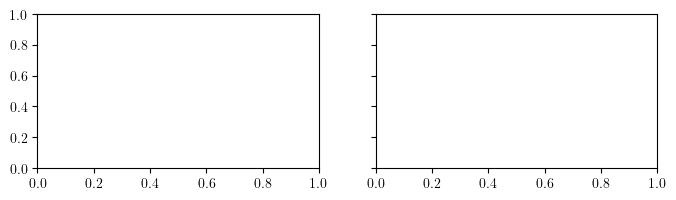

In [72]:
fs = 12
w = 8
h = 2

fig, axs = plt.subplots(1,2, figsize= (w,h), sharey = True)



# First plot: A_UT vs xB at fixed zh
axs[0].plot(xB, A_ofx_at_fixed_z, color='k',label='$\\pi^+$, LO')
axs[0].plot(xB, A2_ofx_at_fixed_z, color ='r' ,linestyle='dashed',label='$\\pi^+$, LO+NLO')
axs[0].set_xlim(0.05 ,0.3)
axs[0].set_ylim(-0.02,0.02)
axs[0].set_xlabel('$x_B$', fontsize=14)
axs[0].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)        
# Second plot: A_UT vs zh at fixed xB
axs[1].plot(zh, A_ofz_at_fixed_x,  color='k',label='$\\pi^+$, LO')
axs[1].plot(zh, A2_ofz_at_fixed_x,color='r',linestyle = 'dashed', label='$\\pi^+$, LO+NLO')
axs[1].set_xlim(0.2 ,.6)
#axs[1].set_ylim(-0.02,0.02)
axs[1].set_xlabel('$z_h$', fontsize=14)
#axs[1].set_ylabel('$$A_{UT}^{\\sin \\phi_S }$$', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)    

axs[0].legend(fancybox= True, framealpha=0, loc='best', fontsize = fs-4, ncol=1)

Sigma xz

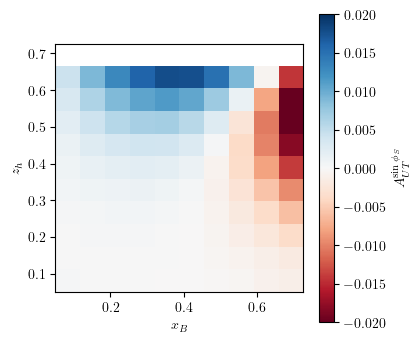

In [ ]:
# set the colormap and centre the colorbar
class MidpointNormalize(mpl.colors.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

df = pd.read_csv('AUT_LO_pp.txt',header=None,sep=' ', decimal = '.')
df = df
N=df.shape[0]


sqrtS = 100 # GeV
y=0.1

fs = 10
save_fig = True
cmap = mpl.cm.RdBu
cmap2 = plt.get_cmap('tab20')
w = 4
h = 4
fontsize = 13
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot()
extent = [xB.min(),xB.max(),zh.min(),zh.max()]
img = ax.imshow(df.T, extent=extent, cmap=cmap, interpolation='none',
                origin='lower' , norm = MidpointNormalize(-0.02,+0.02,0.))
plt.colorbar(img,label = '$A_{UT}^{\\sin \\phi_S }$', norm='centered')
plt.xlabel("$x_B$", fontsize = fs)
plt.ylabel("$z_h$", fontsize = fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV\n$y=' + str(y)+'$'

#plt.text(0.05,0.83,info,fontsize=fs)
#if(save == True):
#        plt.savefig('./output/fig/dsigmadxdz.pdf', dpi=300, bbox_inches='tight')

plt.show()